In [97]:
#random forest bla bla 
#imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier

from scipy.stats import randint

import matplotlib as mpl
import matplotlib.pyplot as plt


In [106]:
#random forest classifier
instance_based_df = pd.read_csv("data_new/instance_based_df.csv")
instance_based_target = instance_based_df['mood_avg_next']
y = instance_based_target.round() #y is je target dus de mood_avg_next
instance_based_cont = instance_based_df.drop('mood_avg_next', axis = 1)
X = instance_based_cont.round() #X zijn je features

column_indices = {name: i for i, name in enumerate(X.columns)}
num_features = X.shape[1]

n = len(X)
X_train = X[0:int(n*0.7)]
X_validation = X[int(n*0.7):int(n*0.9)]
X_test = X[int(n*0.9):]

m = len(y)
y_train = y[0:int(m*0.7)]
y_validation = y[int(m*0.7):int(m*0.9)]
y_test = y[int(m*0.9):]

Accuracy: 0.7368421052631579


c:\Users\eigenaar\Documents\Data_mining\Data-Mining-For-The-Girls\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'max_depth': 15, 'n_estimators': 496}
              precision    recall  f1-score   support

         6.0       0.00      0.00      0.00         7
         7.0       0.10      1.00      0.18         1
         8.0       0.00      0.00      0.00         2

    accuracy                           0.10        10
   macro avg       0.03      0.33      0.06        10
weighted avg       0.01      0.10      0.02        10



c:\Users\eigenaar\Documents\Data_mining\Data-Mining-For-The-Girls\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\eigenaar\Documents\Data_mining\Data-Mining-For-The-Girls\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\eigenaar\Documents\Data_mining\Data-Mining-For-The-Girls\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

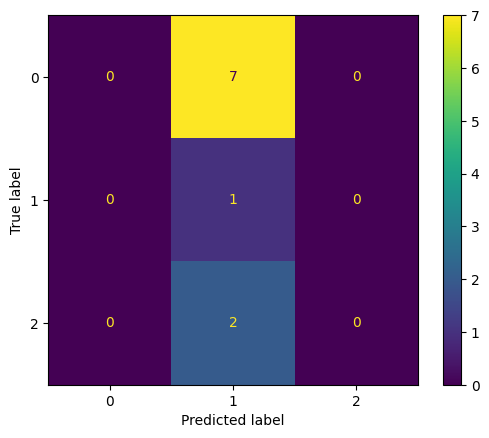

In [107]:
#model fitting en evaluation
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

#prediction
y_prediction = rf_classifier.predict(X_validation)
accuracy = accuracy_score(y_validation, y_prediction)
print("Accuracy:", accuracy)

#hyperparameter tuning
param_dist = {'n_estimators': randint(20,500),
              'max_depth': randint(1,20)}

#random search gebruiken om de beste hyperparameters te vinden, n_iter (the number of parameter settings that are sampled) and cv (the number of cross-validation folds to use)
rand_search = RandomizedSearchCV(rf_classifier, param_distributions= param_dist, n_iter=5, cv=5)  
                                                                                                  
#random search fitten op data
rand_search.fit(X_train, y_train)

#create variable for best model
best_rf_classifier = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

#confusion matrix (tradeoff between false positives (top right) and false negatives(bottom left)
y_pred = best_rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix= cm).plot()

#precision, recall, accuracy, F1-score, support
print(classification_report(y_test, y_pred))

In [108]:
#random forest regression
instance_based_df = pd.read_csv("data_new/instance_based_df.csv")
instance_based_target = instance_based_df['mood_avg_next']
y = instance_based_target #y is je target dus de mood_avg_next
instance_based_cont = instance_based_df.drop('mood_avg_next', axis = 1)
X = instance_based_cont #X zijn je features

column_indices = {name: i for i, name in enumerate(X.columns)}
num_features = X.shape[1]

n = len(X)
X_train = X[0:int(n*0.7)]
X_validation = X[int(n*0.7):int(n*0.9)]
X_test = X[int(n*0.9):]

m = len(y)
y_train = y[0:int(m*0.7)]
y_validation = y[int(m*0.7):int(m*0.9)]
y_test = y[int(m*0.9):]

In [110]:
#model fitting en evaluation
rf_regression = RandomForestRegressor()
rf_regression.fit(X_train, y_train)

#prediction
predictions = rf_regression.predict(X_validation)

#evaluation
mse = mean_squared_error(y_validation, predictions)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_validation, predictions)
print(f"R2 score: {r2}")

mae = mean_absolute_error(y_validation, predictions)
print(f"Mean Absolute Error: {mae}")

#hyperparameter tuning
param_dist = {'n_estimators': randint(20,500),
              'max_depth': randint(1,20)}

#random search gebruiken om de beste hyperparameters te vinden, n_iter (the number of parameter settings that are sampled) and cv (the number of cross-validation folds to use)
rand_search = RandomizedSearchCV(rf_regression, param_distributions= param_dist, n_iter=5, cv=5)  
                                                                                                  
#random search fitten op data
rand_search.fit(X_train, y_train)

#create variable for best model
best_rf_regressor = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)


Mean Squared Error: 0.19720033073591892
R2 score: -0.37557010826654036
Mean Absolute Error: 0.3092307015936972
Best hyperparameters: {'max_depth': 12, 'n_estimators': 65}
